In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
import tensorflow as tf
from tensorflow import keras

2023-03-04 17:28:26.955055: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# read chromosomes
initial_acc = 0.9820393919944763

In [4]:
# mutated chromosomes
chromosomes = None
with open('chromosomes/new_cromosomes_mutated.json') as f:
    chromosomes = json.load(f)

In [5]:
for key, value in chromosomes.items():
    chromosomes[key].append(chromosomes[key][0].count(0))
    chromosomes[key].append(chromosomes[key][0].count(1))
    chromosomes[key][1] = chromosomes[key][1]*100

In [6]:
# sort based on accuracy and number of 0s
chromosomes = {k: v for k, v in sorted(chromosomes.items(), key=lambda item: (item[1][2]), reverse=True)}

In [7]:
len(chromosomes['1'][0])

256

In [8]:
for key, value in chromosomes.items():
    print(key, value[1], value[2])

18 97.07415699958801 102
21 96.81344032287598 102
62 96.72653675079346 91
68 96.90034985542297 89
71 97.19003438949585 89
14 96.61065936088562 88
30 96.6685950756073 88
11 96.69756889343262 87
54 96.61065936088562 86
40 96.78447246551514 85
23 96.9872534275055 84
36 97.07415699958801 84
37 97.01622128486633 84
2 96.78447246551514 83
28 96.90034985542297 83
33 96.92931771278381 83
51 96.90034985542297 83
20 96.87137603759766 82
25 96.63962721824646 82
26 96.5237557888031 82
65 96.95828557014465 82
76 97.01622128486633 82
79 96.55272364616394 82
3 96.58169150352478 81
22 96.08922600746155 81
24 97.16106653213501 81
35 96.81344032287598 81
53 97.13209867477417 81
27 96.95828557014465 80
29 96.95828557014465 80
59 96.6685950756073 80
77 96.63962721824646 80
15 96.9872534275055 79
49 97.04518914222717 79
50 97.45075106620789 79
58 96.4368462562561 79
60 97.42178320884705 79
31 96.9872534275055 78
47 96.92931771278381 78
52 97.19003438949585 78
57 96.7555046081543 78
67 97.01622128486633 78


In [9]:
original_model = keras.models.load_model('models/base_model.h5')

2023-03-04 17:29:10.956199: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-04 17:29:11.114362: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1621] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14476 MB memory:  -> device: 0, name: Tesla V100-SXM2-16GB, pci bus id: 0000:07:00.0, compute capability: 7.0


In [10]:
import generate_sub_model as gsm

In [11]:
print(chromosomes['18'][1:])

[97.07415699958801, 102, 154]


In [12]:
new_model = gsm.genSubModel(chromosomes['18'][0], original_model)

In [13]:
import fitness as fit

KeyboardInterrupt: 

In [16]:
fit.getFitness(new_model, epochs=10, verbose=1)

Epoch 1/10
324/324 [==============================] - 5s 9ms/step - loss: 0.0765 - accuracy: 0.9727 - val_loss: 0.0933 - val_accuracy: 0.9638
Epoch 2/10
324/324 [==============================] - 3s 9ms/step - loss: 0.0612 - accuracy: 0.9779 - val_loss: 0.0843 - val_accuracy: 0.9681
Epoch 3/10
324/324 [==============================] - 3s 8ms/step - loss: 0.0517 - accuracy: 0.9810 - val_loss: 0.1014 - val_accuracy: 0.9649
Epoch 4/10
324/324 [==============================] - 3s 8ms/step - loss: 0.0425 - accuracy: 0.9839 - val_loss: 0.0794 - val_accuracy: 0.9699
Epoch 5/10
324/324 [==============================] - 3s 8ms/step - loss: 0.0430 - accuracy: 0.9839 - val_loss: 0.1073 - val_accuracy: 0.9641
Epoch 6/10
324/324 [==============================] - 3s 8ms/step - loss: 0.0305 - accuracy: 0.9892 - val_loss: 0.0799 - val_accuracy: 0.9702
Epoch 7/10
324/324 [==============================] - 3s 8ms/step - loss: 0.0412 - accuracy: 0.9840 - val_loss: 0.0729 - val_accuracy: 0.9762
Epoch 

0.9736384749412537

In [17]:
# save model
new_model.save('models/new_model.h5')

In [36]:
new_model = gsm.genSubModel(chromosomes['18'][0], original_model)

In [15]:
from test_train_data import x_train, y_train, x_test, y_test

In [39]:
new_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

new_model.fit(x_train, y_train, epochs=30, verbose=1,validation_data=(x_test, y_test))

Epoch 1/30
324/324 [==============================] - 6s 11ms/step - loss: 0.0129 - accuracy: 0.9953 - val_loss: 0.1881 - val_accuracy: 0.9699
Epoch 2/30
324/324 [==============================] - 2s 8ms/step - loss: 0.0066 - accuracy: 0.9978 - val_loss: 0.1736 - val_accuracy: 0.9716
Epoch 3/30
324/324 [==============================] - 2s 8ms/step - loss: 0.0133 - accuracy: 0.9953 - val_loss: 0.1654 - val_accuracy: 0.9670
Epoch 4/30
324/324 [==============================] - 3s 8ms/step - loss: 0.0091 - accuracy: 0.9963 - val_loss: 0.2300 - val_accuracy: 0.9638
Epoch 5/30
324/324 [==============================] - 3s 8ms/step - loss: 0.0151 - accuracy: 0.9939 - val_loss: 0.1676 - val_accuracy: 0.9690
Epoch 6/30
324/324 [==============================] - 3s 8ms/step - loss: 0.0032 - accuracy: 0.9992 - val_loss: 0.1527 - val_accuracy: 0.9716
Epoch 7/30
324/324 [==============================] - 3s 8ms/step - loss: 2.7123e-04 - accuracy: 1.0000 - val_loss: 0.1560 - val_accuracy: 0.9739
E

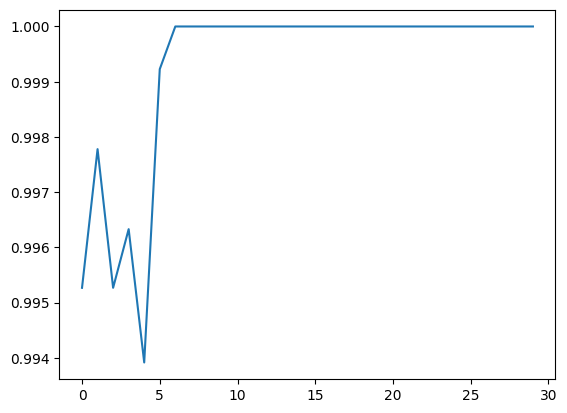

In [40]:
# draw graph of accuracy in each epoch
plt.plot(new_model.history.history['accuracy'])

In [18]:
import copy

In [19]:
for key, value in chromosomes.items():
    to_remove = {}
    to_remove_as_list = copy.deepcopy(value[0])
    for i, layer in enumerate(new_model.layers):
        if(i != 0 and i != len(new_model.layers) - 1):
            if(isinstance(layer, keras.layers.Conv2D)):
                ls = to_remove_as_list[:int(layer.filters)]
                to_remove_as_list = to_remove_as_list[int(layer.filters):]
                zero_idx = ls.count(0)
                to_remove[i] = zero_idx
            elif (isinstance(layer, keras.layers.Dense)):
                ls = to_remove_as_list[:int(layer.units)]
                to_remove_as_list = to_remove_as_list[int(layer.units):]
                zero_idx =  ls.count(0)
                to_remove[i] = zero_idx
    value.append(to_remove)

In [20]:
print(chromosomes['18'][1:])

[97.07415699958801, 102, 154, {2: 7, 4: 13, 6: 8, 9: 36}]


In [ ]:
# sort chromosomes based on number of 0s and accuracy
chromosomes = {k: v for k, v in sorted(chromosomes.items(), key=lambda item: (item[1][3], item[1][2]), reverse=True)}

In [27]:
# get first 10 chromosomes sorted by accuracy
chromosomes_10 = {k: v for k, v in sorted(chromosomes.items(), key=lambda item: (item[1][1]), reverse=True)[:15]}

In [28]:
for key, value in chromosomes_10.items():
    print(value[1])

97.45075106620789
97.42178320884705
97.42178320884705
97.30591177940369
97.27693796157837
97.24797010421753
97.19003438949585
97.19003438949585
97.16106653213501
97.16106653213501
97.13209867477417
97.10313081741333
97.10313081741333
97.10313081741333
97.10313081741333


In [33]:
n = 15
x = np.arange(n)

In [34]:
accuracy = []
zeroes_l1 = []
zeroes_l2 = []
zeroes_l3 = []
zeroes_l4 = []
for key, value in chromosomes_10.items():
    accuracy.append(value[1])
    zeroes_l1.append(value[4][2])
    zeroes_l2.append(value[4][4])
    zeroes_l3.append(value[4][6])
    zeroes_l4.append(value[4][9])

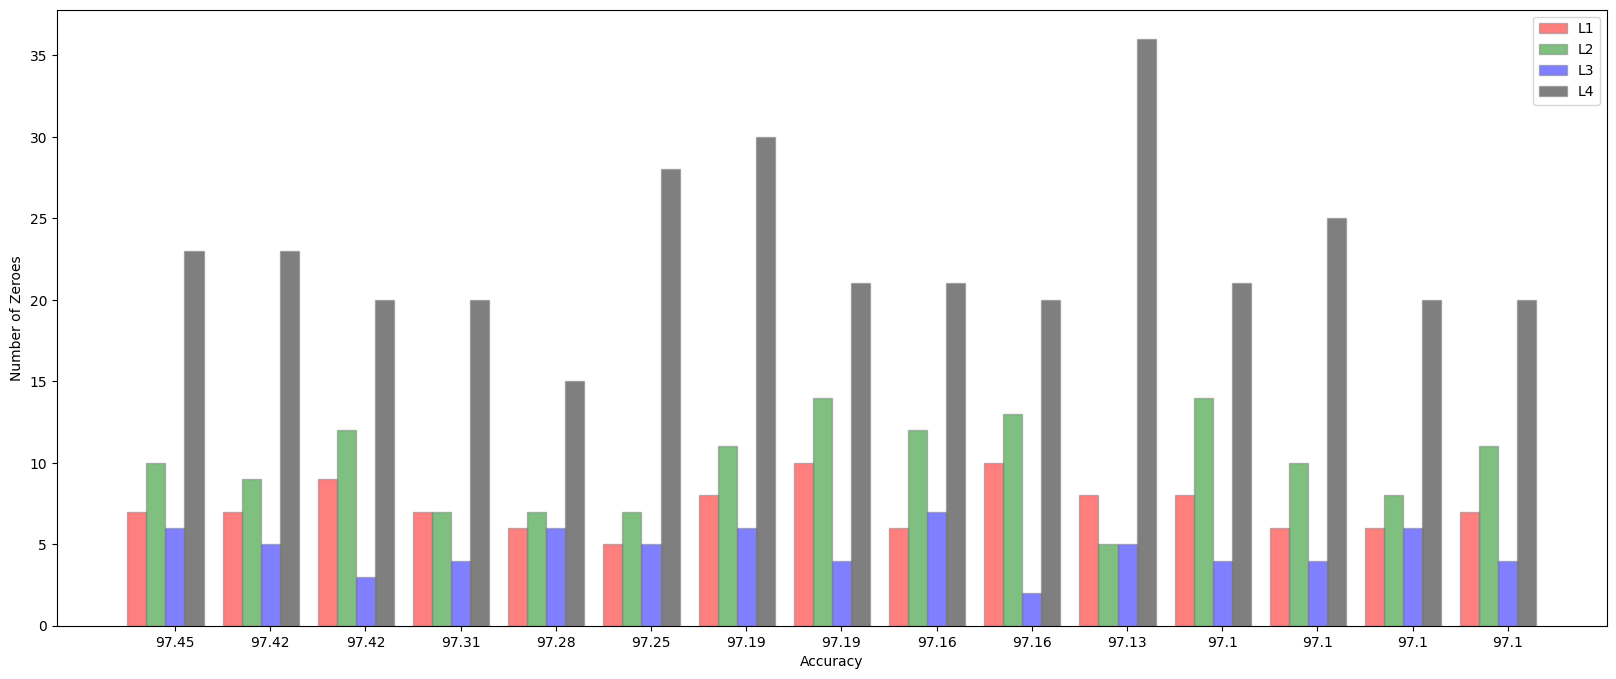

In [41]:
fig = plt.subplots(1,1,figsize =(20, 8))

plt.bar(x, zeroes_l1 , color ='r', width = 0.2,
        edgecolor ='grey', alpha=.5 , label ='L1')

plt.bar(x + 0.2, zeroes_l2 , color ='g', width = 0.2,
        edgecolor ='grey', alpha=.5 , label ='L2')

plt.bar(x+0.4, zeroes_l3 , color ='b', width = 0.2,
        edgecolor ='grey', alpha=.5 , label ='L3')

plt.bar(x+0.6, zeroes_l4 , color ='black', width = 0.2,
        edgecolor ='grey', alpha=.5 , label ='L4')

plt.xlabel("Accuracy")
plt.ylabel("Number of Zeroes")

plt.xticks(x + 0.4, [str(round(float(i),2)) for i in accuracy])

plt.legend()
plt.show()
